**Predict the credit score of bank clients**

The task is to develop a machine learning model to predict the credit score of bank clients based on their financial data, such as income, work experience, credit history, requested loan amount, etc. The task involves conducting exploratory data analysis, data preprocessing, model selection and training, performance evaluation, and result interpretation to enhance decision-making regarding loan approvals.

Необходимо разработать модель машинного обучения для прогнозирования кредитного рейтинга клиентов банка на основе их финансовых данных, таких как доход, стаж работы, история кредитования, сумма запрошенного кредита и тд. Задача включает проведение исследовательского анализа данных, подготовку данных, выбор и обучение модели, оценку ее производительности и интерпретацию результатов для улучшения принятия решений о выдаче кредитов.

### Exploratory data analysis and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('credit_score.csv')
df.head(3)

/var/folders/9h/41tfgtlx7vg3_zr70vr31q8w0000gn/T/ipykernel_1659/1842776913.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
nan_count_method_1 = df.isna().sum()
nan_count_method_1

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
mode_by_A = df.groupby('Customer_ID')['Name'].apply(lambda x: len(x.mode()))
mode_by_A.max()

1

Name и Customer_ID совпадают и уникальны. (Будем удалять.)
Затем заполняем NaN в столбце Name, часто встречающимся именем с данным ID:

In [7]:
mode_by_A = df.groupby('Customer_ID')['Name'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Name'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Name']) else row['Name'], axis=1)

In [8]:
nan_count_method_1 = df.isna().sum()
nan_count_method_1

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

#### Months

Заменем название месяцев на числа

In [9]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [10]:
df['Month'] = df['Month'].replace(month_to_number)

In [11]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


#### Age

In [12]:
df['Age'].head(10)

0      23
1      23
2    -500
3      23
4      23
5      23
6      23
7      23
8     28_
9      28
Name: Age, dtype: object

In [13]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype(float)

In [14]:
nan_count_method_1 = df.isna().sum()
nan_count_method_1['Age']

4939

Заменили тип столбеца 'Age' object на тип float. Заметили что появились пропуски. Теперь сделаем предположения что возраст от 0 до 110 лет и преобразуем столбец 'Age'.

In [15]:
df['Age'] = df['Age'].apply(lambda x: x if x >= 0  and x < 110 else np.nan)

In [16]:
df['Age'].min(), df['Age'].max()

(14.0, 109.0)

In [17]:
mode_by_A = df.groupby('Customer_ID')['Age'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Age'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Age']) else row['Age'], axis=1)

#### Occupation

In [18]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [19]:
df['Occupation'] = df['Occupation'].replace('_______', pd.NA)


In [20]:
mode_by_A = df.groupby('Customer_ID')['Occupation'].apply(lambda x: len(x.mode()))

In [21]:
mode_by_A.max()

1

In [22]:
mode_by_A = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Occupation'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Occupation']) else row['Occupation'], axis=1)

In [23]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


Удалим уникальные столдцы

In [24]:
df.drop(['SSN'], axis=1, inplace=True)

In [25]:
df.drop(['ID'], axis=1, inplace=True)

In [26]:
df.head(3)

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,2,Aaron Maashoh,23.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,3,Aaron Maashoh,23.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


#### Annual_Income

In [27]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').astype(float)
mode_by_A = df.groupby('Customer_ID')['Annual_Income'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

In [28]:
mode_by_A.head(3)

Customer_ID
CUS_0x1000     30625.94
CUS_0x1009     52312.68
CUS_0x100b    113781.39
Name: Annual_Income, dtype: float64

In [29]:
mode_by_A = df.groupby('Customer_ID')['Annual_Income'].apply(lambda x: len(x.mode()))

In [30]:
mode_by_A.max()

1

Следовательно Annual_Income у всех Customer_ID уникальный. Затем выполним замену:

In [31]:
df['Annual_Income'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Annual_Income']) else row['Annual_Income'], axis=1)

#### Monthly_Inhand_Salary

In [32]:
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce').astype(float)
mode_by_A = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

In [33]:
mode_by_A.head(5)

Customer_ID
CUS_0x1000    2706.161667
CUS_0x1009    4250.390000
CUS_0x100b    9549.782500
CUS_0x1011    5208.872500
CUS_0x1013    7962.415000
Name: Monthly_Inhand_Salary, dtype: float64

In [34]:
mode_by_A = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: len(x.mode()))

In [35]:
mode_by_A.max()

2

Значения оказались не уникальные, по этому сделаем два столбца

In [36]:
df['Monthly_Inhand_Salary_Change'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: len(x.mode()))

In [37]:
df.drop(['Monthly_Inhand_Salary'], axis=1, inplace=True)

In [38]:
df.head(3)

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary_Change
0,CUS_0xd40,1,Aaron Maashoh,23.0,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,CUS_0xd40,2,Aaron Maashoh,23.0,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1
2,CUS_0xd40,3,Aaron Maashoh,23.0,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1


#### Num_Bank_Accounts

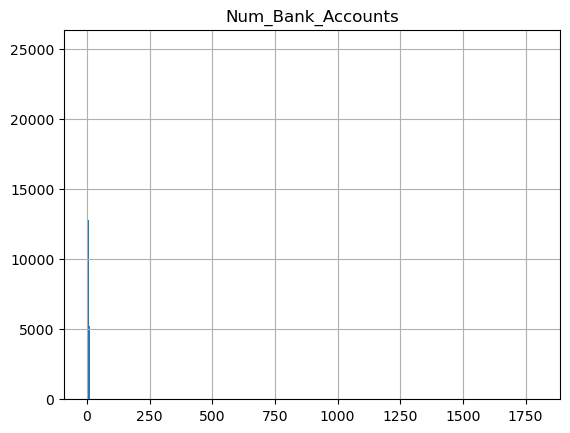

In [39]:
df.hist(column='Num_Bank_Accounts',bins = 1000);

In [40]:
df['Num_Bank_Accounts'].value_counts().head(11)

6     13001
7     12823
8     12765
4     12186
5     12118
3     11950
9      5443
10     5247
1      4490
0      4328
2      4304
Name: Num_Bank_Accounts, dtype: int64

In [41]:
df['Num_Bank_Accounts'].value_counts().tail(11)

928     1
243     1
583     1
1695    1
726     1
987     1
1626    1
1470    1
887     1
211     1
697     1
Name: Num_Bank_Accounts, dtype: int64

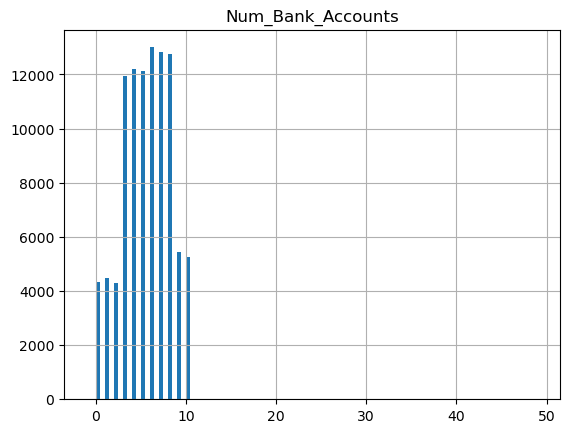

In [42]:
df[df['Num_Bank_Accounts']<50].hist(column='Num_Bank_Accounts',bins = 100);

In [43]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce').astype(float)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0  and x < 12 else np.nan)

In [44]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce').astype(float)

In [45]:
#Num_Bank_Accounts_Change
df['Num_Bank_Accounts_Change'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: len(x.mode()))

In [46]:
df['Num_Bank_Accounts_Change'].max()

2

In [47]:
mode_by_A = df.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_Bank_Accounts'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_Bank_Accounts']) else row['Num_Bank_Accounts'], axis=1)

#### Num_Credit_Card

array([[<Axes: title={'center': 'Num_Credit_Card'}>]], dtype=object)

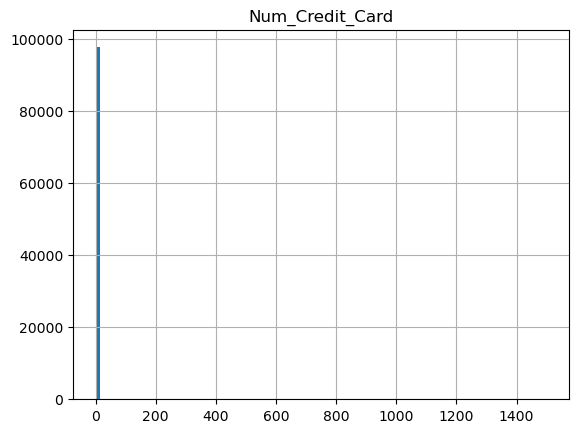

In [50]:
df.hist(column="Num_Credit_Card", bins=100)

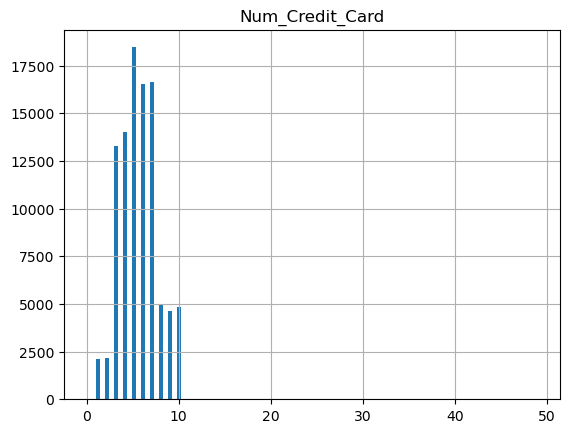

In [51]:
df[df["Num_Credit_Card"]<50].hist(column="Num_Credit_Card", bins=100);

In [52]:
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce').astype(float)
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: x if x >= 0  and x < 11 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_Credit_Card'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_Credit_Card']) else row['Num_Credit_Card'], axis=1)

#### Interest_Rate

array([[<Axes: title={'center': 'Interest_Rate'}>]], dtype=object)

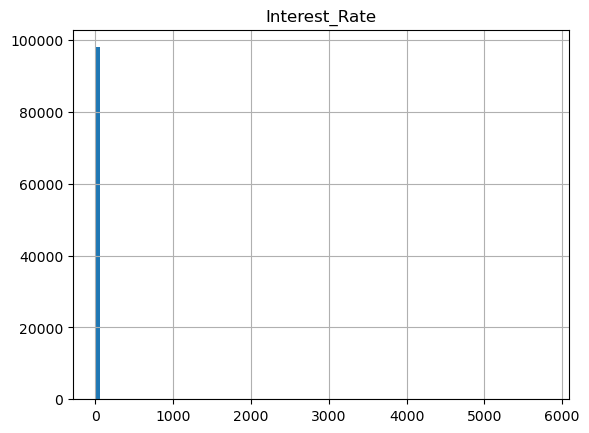

In [54]:
df.hist(column="Interest_Rate", bins=100)

array([[<Axes: title={'center': 'Interest_Rate'}>]], dtype=object)

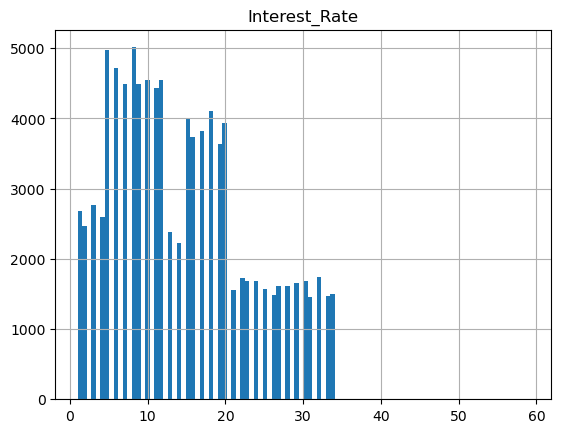

In [55]:
df[df["Interest_Rate"]<60].hist(column="Interest_Rate", bins=100)

In [56]:
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce').astype(float)
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x >= 0  and x < 40 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Interest_Rate'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Interest_Rate']) else row['Interest_Rate'], axis=1)

#### Num_of_Loan

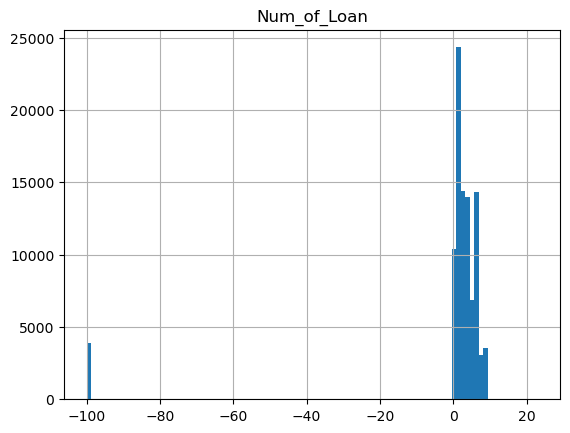

In [57]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype(float)
df[df["Num_of_Loan"]<25].hist(column="Num_of_Loan", bins=100);

In [58]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: x if x >= 0  and x < 15 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_of_Loan'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_of_Loan']) else row['Num_of_Loan'], axis=1)

#### Type_of_Loan

In [59]:
df['Type_of_Loan'].head(5)

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1    Auto Loan, Credit-Builder Loan, Personal Loan,...
2    Auto Loan, Credit-Builder Loan, Personal Loan,...
3    Auto Loan, Credit-Builder Loan, Personal Loan,...
4    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object

In [60]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [61]:
df.drop(['Type_of_Loan'], axis=1, inplace=True)

#### Delay_from_due_date

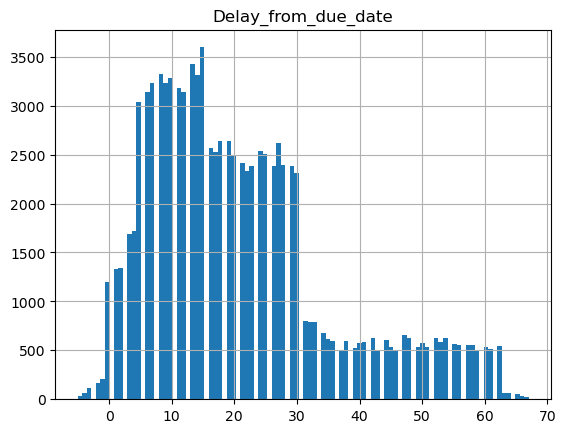

In [62]:
df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce').astype(float)
df[df["Delay_from_due_date"]<70].hist(column="Delay_from_due_date", bins=100);

#### Num_of_Delayed_Payment

In [64]:
df['Num_of_Delayed_Payment'].head(3)

0      7
1    NaN
2      7
Name: Num_of_Delayed_Payment, dtype: object

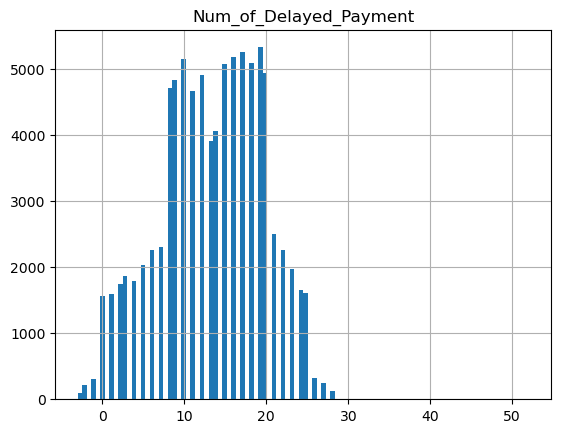

In [65]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype(float)
df[df["Num_of_Delayed_Payment"]<70].hist(column="Num_of_Delayed_Payment", bins=100);

In [66]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: x if x >= 0  and x < 30 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_of_Delayed_Payment'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_of_Delayed_Payment']) else row['Num_of_Delayed_Payment'], axis=1)

#### Changed_Credit_Limit

In [68]:
df['Changed_Credit_Limit'].head(5)

0    11.27
1    11.27
2        _
3     6.27
4    11.27
Name: Changed_Credit_Limit, dtype: object

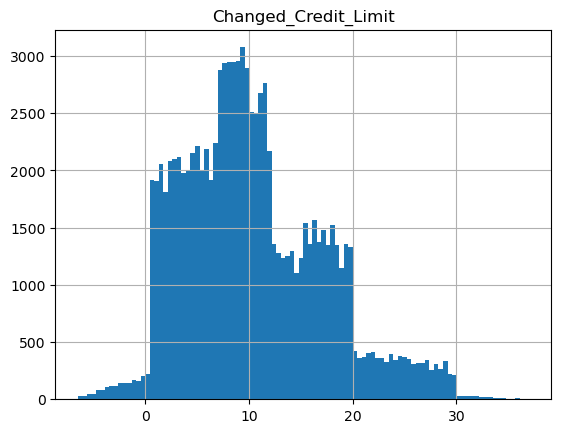

In [69]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype(float)
df[df["Changed_Credit_Limit"]<70].hist(column="Changed_Credit_Limit", bins=100);

In [70]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: x if x >= -10  and x < 40 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Changed_Credit_Limit'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Changed_Credit_Limit']) else row['Changed_Credit_Limit'], axis=1)

#### Num_Credit_Inquiries

In [71]:
df['Num_Credit_Inquiries'].max()

2597.0

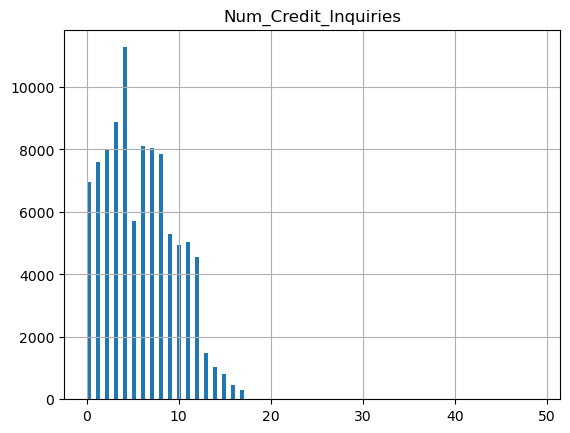

In [72]:
df[df['Num_Credit_Inquiries']<50].hist(column="Num_Credit_Inquiries", bins=100);

In [73]:
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce').astype(float)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: x if x >= 0  and x < 20 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Num_Credit_Inquiries'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Num_Credit_Inquiries']) else row['Num_Credit_Inquiries'], axis=1)

In [74]:
nan_count_method_1 = df['Num_Credit_Inquiries'].isna().sum()
nan_count_method_1

0

#### Credit_Mix

In [75]:
df['Credit_Mix'].head(5)

0       _
1    Good
2    Good
3    Good
4    Good
Name: Credit_Mix, dtype: object

In [76]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [77]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', pd.NA)

In [78]:
mode_by_A = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: len(x.mode()))
mode_by_A.max()

1

In [79]:
mode_by_A = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
df['Credit_Mix'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Credit_Mix']) else row['Credit_Mix'], axis=1)

In [80]:
# Применение метода get_dummies для создания OneHotEncoder
one_hot_encoded = pd.get_dummies(df['Credit_Mix'])
# Объединение исходного датафрейма и OneHotEncoder
df = pd.concat([df, one_hot_encoded], axis=1)
df.head(3)

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Monthly_Inhand_Salary_Change,Num_Bank_Accounts_Change,Bad,Good,Standard
0,CUS_0xd40,1,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1,1,0,1,0
1,CUS_0xd40,2,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1,1,0,1,0
2,CUS_0xd40,3,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1,1,0,1,0


In [81]:
df.drop(['Credit_Mix'], axis=1, inplace=True)

#### Outstanding_Debt	

In [83]:
df['Outstanding_Debt'].head(5)

0    809.98
1    809.98
2    809.98
3    809.98
4    809.98
Name: Outstanding_Debt, dtype: object

In [85]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').astype(float)

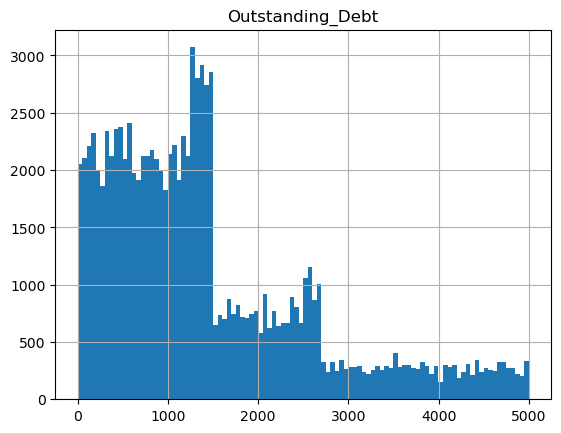

In [86]:
df.hist(column="Outstanding_Debt", bins=100);

In [97]:
mode_by_A = df.groupby('Customer_ID')['Outstanding_Debt'].apply(lambda x: len(x.mode()))
mode_by_A.max()

1

In [98]:
df['Outstanding_Debt'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Outstanding_Debt']) else row['Outstanding_Debt'], axis=1)

#### Credit_Utilization_Ratio

In [87]:
df['Credit_Utilization_Ratio'].head(5)

0    26.822620
1    31.944960
2    28.609352
3    31.377862
4    24.797347
Name: Credit_Utilization_Ratio, dtype: float64

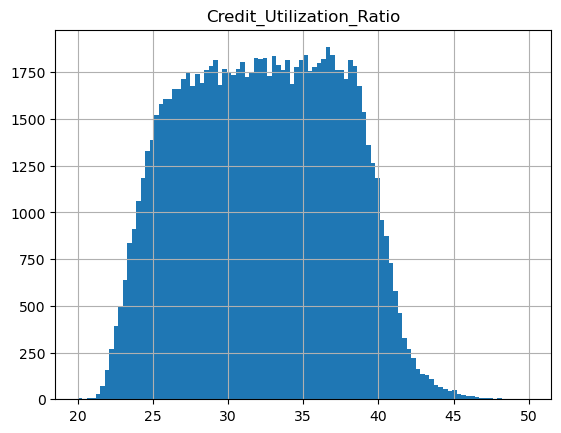

In [88]:
df.hist(column="Credit_Utilization_Ratio", bins=100);

#### Credit_History_Age

In [89]:
def test_Credit_History_Age(a):
    return a.split(" ")[0]

In [90]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)').astype(np.float32)

In [91]:
df['Credit_History_Age'].head(5)

0    22.0
1     NaN
2    22.0
3    22.0
4    22.0
Name: Credit_History_Age, dtype: float32

In [92]:
nan_count_method_1 = df['Credit_History_Age'].isna().sum()
nan_count_method_1

9030

In [93]:
mode_by_A = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: len(x.mode()))
mode_by_A.max()

2

In [94]:
df['Credit_History_Age_Change'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: len(x.mode()))
df.drop(['Credit_History_Age'], axis=1, inplace=True)

#### Payment_of_Min_Amount

In [101]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [102]:
filter_df = df[df['Payment_of_Min_Amount'] == 'NM']
filter_df['Payment_of_Min_Amount'].head(3)

14    NM
26    NM
33    NM
Name: Payment_of_Min_Amount, dtype: object

Неизвестное значение NM заменим на Null

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', pd.NA)

In [119]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
Name: Payment_of_Min_Amount, dtype: int64

In [103]:
mode_by_A = df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: len(x.mode()))
mode_by_A.max()

2

In [105]:
# Изменяем тип данных столбца на bool
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'Yes': 1, 'No': 0})

In [ ]:
df['Payment_of_Min_Amount_Change'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: len(x.mode()))
df.drop(['Payment_of_Min_Amount'], axis=1, inplace=True)

In [109]:
df["Payment_of_Min_Amount_Change"].value_counts()

1    99216
2      784
Name: Payment_of_Min_Amount_Change, dtype: int64

#### Total_EMI_per_month

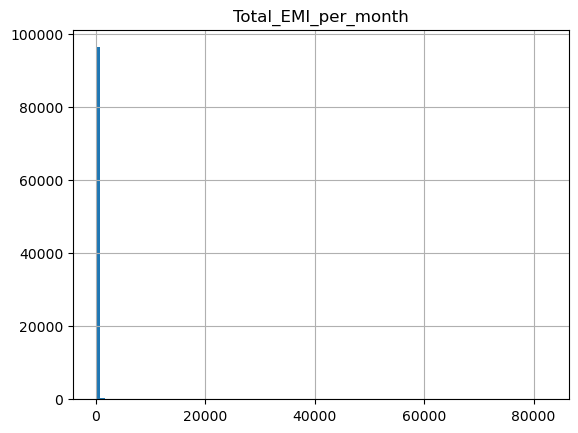

In [111]:
df.hist(column="Total_EMI_per_month", bins=100);

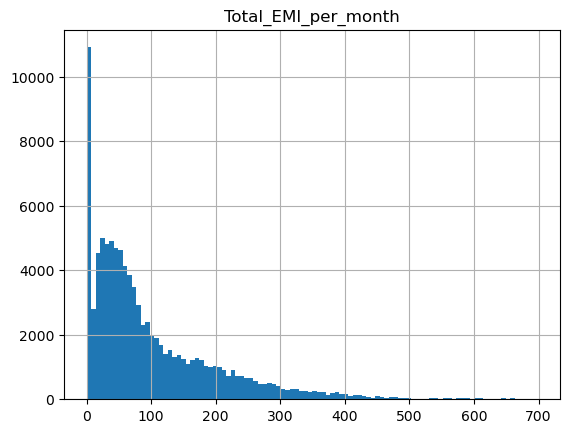

In [112]:
df[df["Total_EMI_per_month"]<700].hist(column="Total_EMI_per_month", bins=100);

In [116]:
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce').astype(float)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].apply(lambda x: x if x > 0  and x < 700 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Total_EMI_per_month'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

In [117]:
mode_by_A.max()

696.2149440750084

In [122]:
df.drop(['Total_EMI_per_month'], axis=1, inplace=True)

#### Amount_invested_monthly

In [124]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)

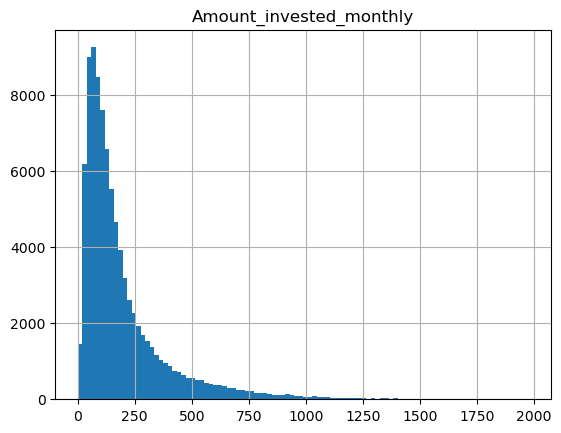

In [125]:
df.hist(column="Amount_invested_monthly", bins=100);

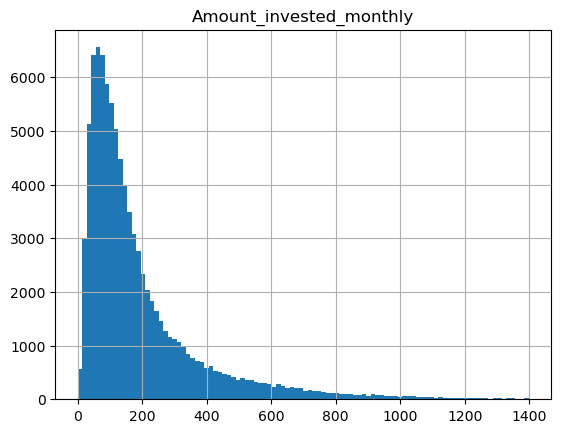

In [126]:
df[df["Amount_invested_monthly"]<1400].hist(column="Amount_invested_monthly", bins=100);

In [127]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: x if x >= 0  and x < 1400 else np.nan)
mode_by_A = df.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)
mode_by_A.max() 
#df['Amount_invested_monthly'] = df.apply(lambda row: mode_by_A[row['Customer_ID']] if pd.isnull(row['Amount_invested_monthly']) else row['Amount_invested_monthly'], axis=1)

510.7262372637133

In [128]:
df.drop(['Amount_invested_monthly'], axis=1, inplace=True)

#### Payment_Behaviour

In [129]:
df['Payment_Behaviour'].head(5)

0     High_spent_Small_value_payments
1      Low_spent_Large_value_payments
2     Low_spent_Medium_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

In [130]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [131]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', pd.NA)

In [134]:
df.drop(['Payment_Behaviour'], axis=1, inplace=True)

#### Monthly_Balance

In [135]:
df['Monthly_Balance'].head(5)

0    312.49408867943663
1    284.62916249607184
2     331.2098628537912
3    223.45130972736786
4    341.48923103222177
Name: Monthly_Balance, dtype: object

In [136]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype(float)

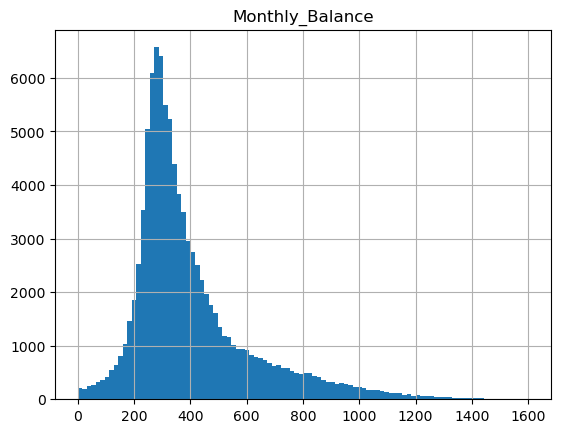

In [137]:
df.hist(column="Monthly_Balance", bins=100);

In [138]:
df.drop(['Monthly_Balance'], axis=1, inplace=True)

#### Credit_Score

In [139]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [140]:
score_to_number = {
    'Poor': 1,
    'Standard': 2,
    'Good': 3
}

In [141]:
df['Credit_Score'] = df['Credit_Score'].replace(score_to_number).astype(int)

In [142]:
df['Credit_Score'].value_counts()

2    53174
1    28998
3    17828
Name: Credit_Score, dtype: int64

### Model selection and training

In [143]:
df.head(5)

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_Score,Monthly_Inhand_Salary_Change,Num_Bank_Accounts_Change,Bad,Good,Standard,Credit_History_Age_Change,Payment_of_Min_Amount_Change
0,CUS_0xd40,1,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,3,1,1,0,1,0,1,1
1,CUS_0xd40,2,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,4.0,809.98,31.944960,3,1,1,0,1,0,1,1
2,CUS_0xd40,3,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,3,1,1,0,1,0,1,1
3,CUS_0xd40,4,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,3,1,1,0,1,0,1,1
4,CUS_0xd40,5,Aaron Maashoh,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,3,1,1,0,1,0,1,1


In [144]:
df.to_csv('v3_credit_score_with_Name-Customer_ID.csv')

In [145]:
df.drop(['Name', 'Customer_ID'],axis=1,inplace=True)

/var/folders/9h/41tfgtlx7vg3_zr70vr31q8w0000gn/T/ipykernel_1659/3738696617.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr().round(3).sort_values('Credit_Score')


<Axes: >

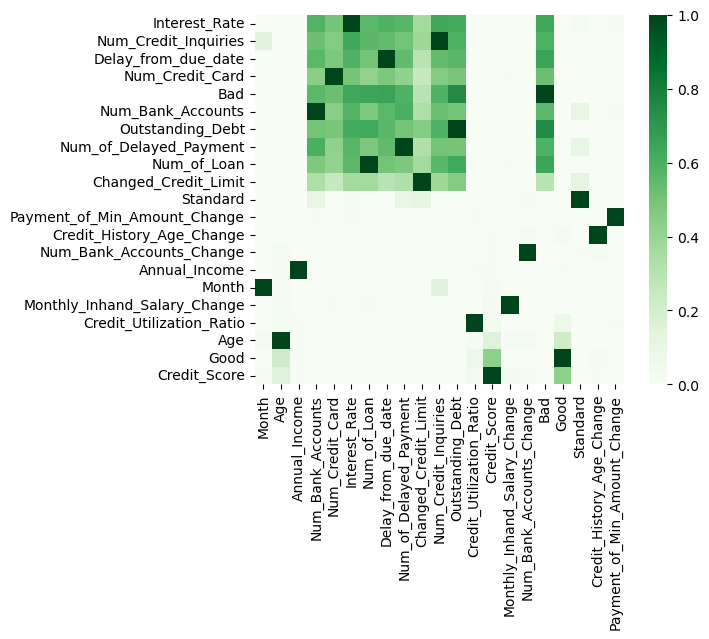

In [146]:
corrs = df.corr().round(3).sort_values('Credit_Score')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

In [148]:
df.drop(['Annual_Income', 'Payment_of_Min_Amount_Change', 'Credit_History_Age_Change', 'Num_Bank_Accounts_Change', 'Monthly_Inhand_Salary_Change'],axis=1,inplace=True)

In [149]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
X = df.drop(['Credit_Score'], axis=1, errors = 'ignore')
y = df['Credit_Score'].fillna(0)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X.head(10)

,Month,Age,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Bad,Good,Standard
0,1,23.0,Scientist,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,0,1,0
1,2,23.0,Scientist,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,4.0,809.98,31.944960,0,1,0
2,3,23.0,Scientist,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,0,1,0
3,4,23.0,Scientist,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,0,1,0
4,5,23.0,Scientist,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,0,1,0
5,6,23.0,Scientist,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,0,1,0
6,7,23.0,Scientist,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,22.537593,0,1,0
7,8,23.0,Scientist,3.0,4.0,3.0,4.0,3.0,6.0,11.27,4.0,809.98,23.933795,0,1,0
8,1,28.0,Teacher,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,605.03,24.464031,0,1,0
9,2,28.0,Teacher,2.0,4.0,6.0,1.0,7.0,1.0,7.42,2.0,605.03,38.550848,0,1,0


In [153]:
cat_cols = ['Occupation']
model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1,eval_metric='AUC')
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=True, 
          early_stopping_rounds=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.117866
0:	test: 0.8497687	best: 0.8497687 (0)	total: 95.1ms	remaining: 1m 35s
100:	test: 0.8990728	best: 0.8990728 (100)	total: 2.49s	remaining: 22.2s
200:	test: 0.9056482	best: 0.9056482 (200)	total: 4.89s	remaining: 19.5s
300:	test: 0.9094897	best: 0.9094897 (300)	total: 7.23s	remaining: 16.8s
400:	test: 0.9121722	best: 0.9121722 (400)	total: 9.67s	remaining: 14.4s
500:	test: 0.9151292	best: 0.9151292 (500)	total: 12s	remaining: 11.9s
600:	test: 0.9178913	best: 0.9178913 (600)	total: 14.4s	remaining: 9.54s
700:	test: 0.9200359	best: 0.9200359 (700)	total: 16.7s	remaining: 7.14s
800:	test: 0.9220609	best: 0.9220609 (800)	total: 19.1s	remaining: 4.74s
900:	test: 0.9233513	best: 0.9233513 (900)	total: 21.6s	remaining: 2.38s
999:	test: 0.9246766	best: 0.9246766 (999)	total: 24.1s	remaining: 0us

bestTest = 0.9246765721
bestIteration = 999



### Performance evaluation

In [156]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = pred.reshape(20000)
confusion_matrix(y_test,pred)

array([[4326, 1294,  254],
       [1287, 8357,  955],
       [  61, 1026, 2440]])

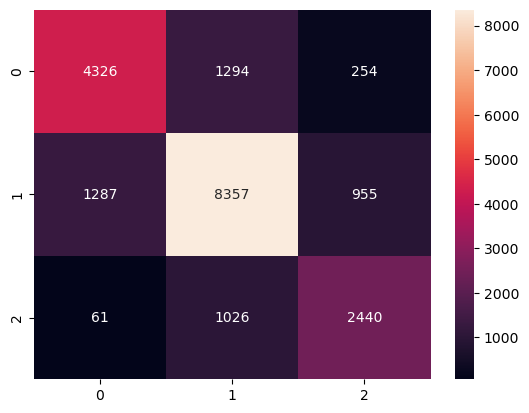

In [157]:
import seaborn as sns
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True , fmt=".0f");